In [1]:
# Se importan las librerias
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
import pandas as pd ### para manejo de datos
import sqlite3 as sql

from sklearn import linear_model ## para regresión lineal
from sklearn import tree ###para ajustar arboles de decisión
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor ##Ensamble con bagging
from sklearn.ensemble import GradientBoostingRegressor ###Ensamble boosting
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

import numpy as np 
import matplotlib.pyplot as plt ### gráficos
from sklearn.model_selection import RandomizedSearchCV
import joblib  ### para guardar modelos
from sklearn.preprocessing import StandardScaler ## escalar variables 

In [2]:
X_m1 = pd.read_csv("Tablas\X_m1.csv", sep= ',')
y = pd.read_csv("Tablas\y.csv", sep= ',')

In [3]:
X_m1

,Unnamed: 0,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2.0,...,EnvironmentSatisfaction_3.0,EnvironmentSatisfaction_4.0,JobSatisfaction_1.0,JobSatisfaction_2.0,JobSatisfaction_3.0,JobSatisfaction_4.0,WorkLifeBalance_2.0,WorkLifeBalance_3.0,StockOptionLevel_0.0,StockOptionLevel_1.0
0,0,0.206897,0.655833,0.111111,0.279528,0,1,0,1,1,...,1,0,0,0,0,1,1,0,1,0
1,1,0.344828,0.209460,0.000000,0.348425,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,2,0.586207,0.966448,0.111111,0.208661,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,0.068966,0.416071,0.333333,0.244094,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
4,4,0.344828,0.117106,0.444444,0.405512,0,1,1,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4405,0.172414,0.301465,0.333333,0.505906,0,1,1,0,0,...,0,1,1,0,0,0,0,1,0,1
4406,4406,0.068966,0.133957,0.222222,0.027559,0,1,1,0,0,...,0,1,0,0,0,1,0,1,1,0
4407,4407,0.862069,0.185109,0.000000,0.346457,0,1,1,0,1,...,0,0,0,0,1,0,0,1,1,0
4408,4408,0.620690,0.119906,0.000000,0.696850,0,1,0,1,1,...,0,1,1,0,0,0,0,1,0,1


In [4]:
X_m1.drop('Unnamed: 0',axis=1, inplace=True)
y.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
#separacion de datos
X_train,X_test,y_train,y_test=train_test_split(X_m1,y,test_size=0.2,random_state=0)

* **n_estimators:** número de árboles de decisión que se utilizarán en el modelo de Random Forest.
* **max_depth:** la profundidad maxima que cada arbol
* **max_features:** maxima cantidad de caracteristicas, controla las caracteristicas que considera la division de cada arbol de decision
* **criterion:** la medida de calidad utilizada para evaluar la calidad de cada división de cada árbol de decisión individual en el bosque aleatorio

In [6]:
parameters = [{
    'n_estimators':[50,100],
    'max_depth':[5,10,30,50,100,200],
    'max_features':[0.1,0.5,0.9],
    'criterion':['gini', 'entropy'],
    'class_weight':['balanced', None]
}]

#Definición del modelo
ranfor=RandomForestClassifier(random_state=42)

grid_search=GridSearchCV(ranfor, parameters, cv=5, scoring='accuracy',n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)
bp=grid_result.best_params_

print('Best parameters: ', grid_result.best_params_)
print('Best score: ',grid_result.best_score_)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters:  {'class_weight': None, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 0.5, 'n_estimators': 100}
Best score:  0.9770425732827036


In [7]:
joblib.dump(ranfor, 'pkls\ ranfor.pkl')
joblib.dump(bp, 'pkls\ bestparams.pkl')


['pkls\\ bestparams.pkl']

In [8]:
#Creacion modelo RandomForestClassifier
m1_ranfor=RandomForestClassifier(
        n_estimators=100,
        criterion='entropy',
        max_depth=30,
        random_state=42,
        max_features=0.5
)
m1_ranfor.fit(X_train,y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=30, max_features=0.5,
                       random_state=42)

In [9]:
#Metricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, m1_ranfor.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, m1_ranfor.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, m1_ranfor.predict(X_test)))
print ("Test - classification report :\n", metrics.classification_report(y_test, m1_ranfor.predict(X_test)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2962
           1       1.00      1.00      1.00       566

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 0.9931972789115646
Test - classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       737
           1       1.00      0.96      0.98       145

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



In [10]:
# Obtener las probabilidades de predicción
y_pred_prob = m1_ranfor.predict_proba(X_test)[:, 1]

In [11]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

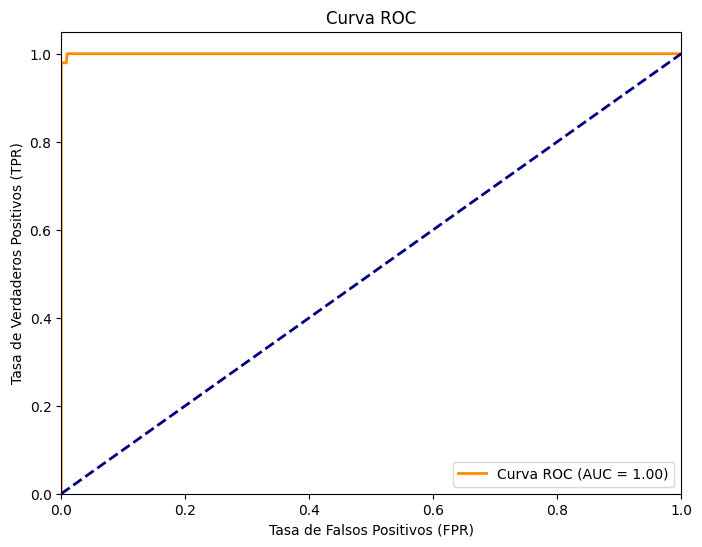

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

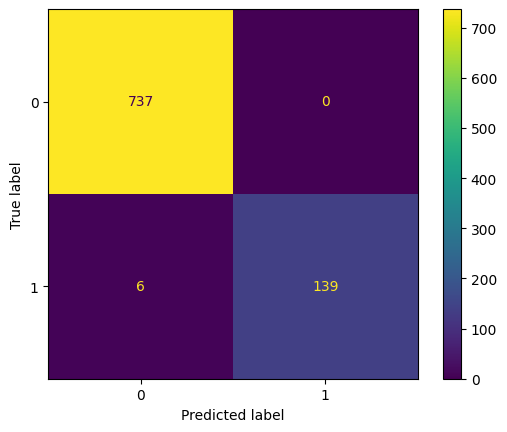

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Matriz de confusión
cm1=confusion_matrix(y_test,m1_ranfor.predict(X_test))
# Visualización de la matriz de confusión
cm1_display=ConfusionMatrixDisplay(confusion_matrix=cm1)
cm1_display.plot()
plt.show()

In [14]:
score=cross_val_score(m1_ranfor,X_m1,y, scoring='accuracy', cv=4 )

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionW

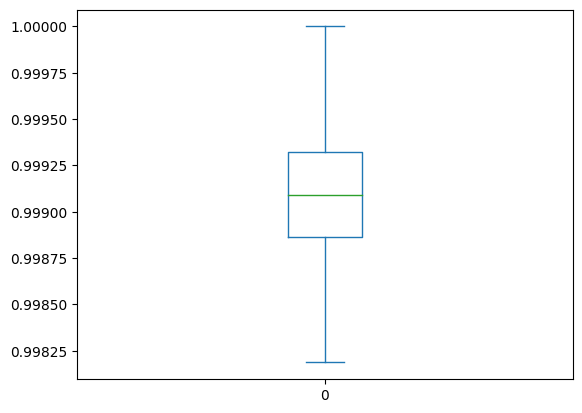

In [15]:
score=pd.DataFrame(score)
score.plot(kind='box')

plt.show()

In [16]:
#Importacia de cada factor 
columns=pd.DataFrame(X_m1.columns).rename(columns={0:'columns'})
#Creación del Data frame con el nivel de importacia
importances=pd.DataFrame(m1_ranfor.feature_importances_).rename(columns={0:'importances'})
cf=pd.concat([columns,importances], axis=1)

#Se organiza el Dataframe de mayor a menor y se escoge el top 10
cf=cf.sort_values('importances',ascending=False).head(10)


#Creación del gráfico
fig = px.bar(cf, x='importances', y='columns', color = 'columns',  title ='<b>Importancia de los factores que analiza el modelo  (Top 10) <b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Importancia de los factores',
    yaxis_title = 'Factores',
    template = 'simple_white',
    title_x = 0.5,
    showlegend=False)

In [26]:
cf

,columns,importances
3,mean_time,0.185164
1,MonthlyIncome,0.137592
0,DistanceFromHome,0.105105
2,NumCompaniesWorked,0.061564
21,MaritalStatus_Single,0.036064
24,EnvironmentSatisfaction_1.0,0.021340
33,WorkLifeBalance_3.0,0.019975
28,JobSatisfaction_1.0,0.019522
34,StockOptionLevel_0.0,0.019211
4,BusinessTravel_Travel_Frequently,0.018864


In [17]:
predictions=cross_val_predict(m1_ranfor,X_m1,y,cv=5)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(

In [18]:
pred=pd.DataFrame(predictions,columns=['pred'])

<Axes: >

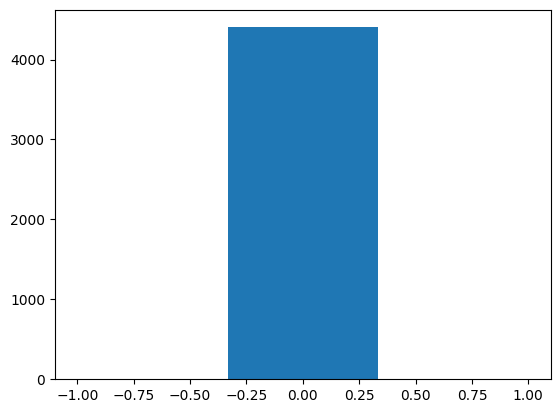

In [19]:
pred=pd.DataFrame(predictions,columns=['pred'])
pdy=pd.DataFrame(y)
error=pdy['Attrition']-pred['pred']
error.hist(bins=3, grid=False)
#error.ylim(-0.0001, 0.0001)

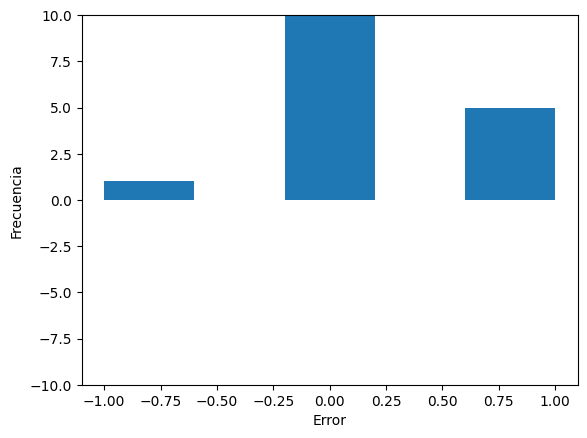

In [20]:
# Crear el histograma
plt.hist(error, bins=5)

# Definir los límites del eje y para acercar el gráfico a cero
plt.ylim(-10, 10)  # Ajusta los valores -10 y 10 según tus necesidades

# Personalizar etiquetas de los ejes
plt.xlabel('Error')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

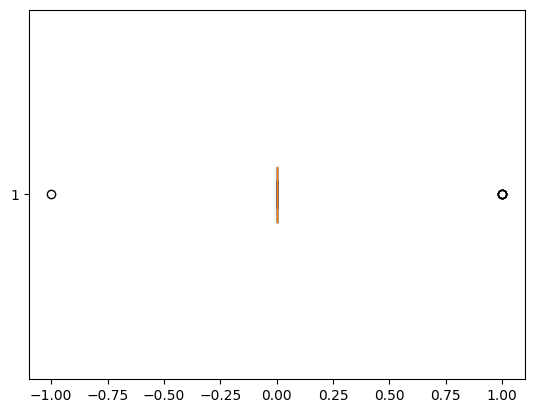

In [21]:
plt.boxplot(error,vert=False)
plt.show()

In [22]:
eval=cross_validate(m1_ranfor,X_m1,y,cv=5,scoring="accuracy",return_train_score=True)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(

In [23]:
train_rf=pd.DataFrame(eval['train_score'])
test_rf=pd.DataFrame(eval['test_score'])
train_test_rf=pd.concat([train_rf, test_rf],axis=1)
train_test_rf.columns=['train_score','test_score']

In [24]:
train_test_rf

,train_score,test_score
0,1.0,0.997732
1,1.0,0.996599
2,1.0,0.998866
3,1.0,1.000000
4,1.0,1.000000


In [25]:
train_test_rf["test_score"].mean()

0.9986394557823128